# Simple Linear Regression

### Problem Statement :- 

    - Build a model to predict the salary of the empoyees

In [10]:
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Preparation

In [11]:
import pandas as pd
import numpy as np
sal = pd.read_csv ("~/desktop/Digi 360/Module 6/DataSets-4/Salary_Data.csv")
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
# Renaming the columns

sal = sal.rename(columns={'YearsExperience':'exp','Salary':'sal'})

In [13]:
##let's describe the DF
sal.describe()

,exp,sal
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
#Median for weight gained
print(sal.sal.median())

65237.0


In [15]:
#Median for cals consumed
print(sal.exp.median())

4.7


Here, the mean is greater than the median for experience so the distribution is right skewed. 

Similarly, the mean is greater than the median for salary hike so the distribution is right skewed. 

### Visualization

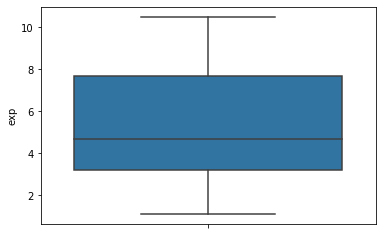

In [17]:
##Boxplot for salary hike
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=sal['exp'])
plt.show()

In [18]:
#Finding outliers for Salary_hike
Q1 =  sal['exp'].quantile(0.25)
Q3 =  sal['exp'].quantile(0.75)
IQR = Q3 - Q1
Outlr = sal[(sal['exp'] < Q1-1.5*IQR ) | (sal['exp'] > Q3+1.5*IQR)]['exp']
print("Outliers:", Outlr)

Outliers: Series([], Name: exp, dtype: float64)


So, there are no outliers.

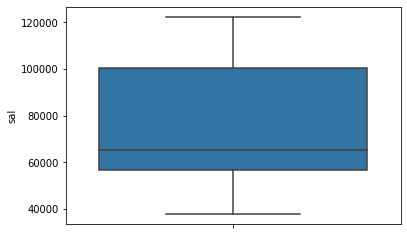

In [19]:
#Boxplot for Churn_out_rate
import seaborn as sns
sns.boxplot(y=sal['sal'])
plt.show()

In [20]:
###Finding outliers for Churn_out_rate
Q1 =  sal['sal'].quantile(0.25)
Q3 =  sal['sal'].quantile(0.75)
IQR = Q3 - Q1
Outlr = sal[(sal['sal'] < Q1-1.5*IQR ) | (sal['sal'] > Q3+1.5*IQR)]['sal']
print("Outliers:", Outlr)


Outliers: Series([], Name: sal, dtype: float64)


So, there are no outliers.

Let’s draw scatter diagram to see the relationship between experience and salry.

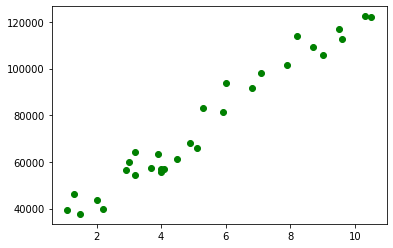

In [22]:
import matplotlib.pylab as plt
plt.scatter(x=sal['exp'],y=sal['sal'],color='green')
plt.show()

### Finding the correlation

In [23]:
#Finding the correlation coefficient
np.corrcoef(sal.exp,sal.sal)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

Here the correlation coefficient value is 0.98 which is less than 0.85. So, the relationship between salary and experience is very strong.

### Model Building

In [24]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols('sal ~ exp', data = sal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.14e-20
Time:                        16:56:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, the linear equation is 
y^ = 25792.2 + 9450x. Here y^ = salary hike and x = years of experience. 

Here p value is less than 0.05 so we reject the null hypothesis. That means there is significant correlation between salary hike and years of experience.

Here we also can see R-squared value is 0.957 which is greater than 0.85. Hence our model is good and we don’t need further transformations. 


### Model Evolution

In [25]:
pred = model.predict(pd.DataFrame(sal['exp']))
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [26]:
#99% CI 
print(model.conf_int(0.01))

                      0             1
Intercept  19511.156989  32073.243408
exp         8403.364027  10496.560616


In [27]:
#Finding RMSE
res = sal.sal - pred
squares = res * res
mse = np.mean(squares)
rmse = np.sqrt(mse)
rmse

5592.043608760661

So, we can conclude that our predicted values are 5592 points deviated from actual values for linear model.

Since R^2 value is less than 0.96, our model is good.

### Conclusion:- 

    - R^2 value for the model is 0.96
    - We don't need further transactions.